In [149]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
#reading the dataset
df = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\archive (6)\\Country-data.csv")

In [151]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# exploratory  data analysis

In [98]:
df.shape

(167, 10)

In [99]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [100]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [101]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [102]:
#label encoding the class(dependent variable) 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [103]:
le.fit(df['country'])

LabelEncoder()

In [104]:
list(le.classes_)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita

In [105]:
df['country']=le.transform(df['country'])
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


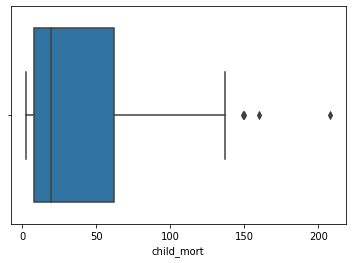

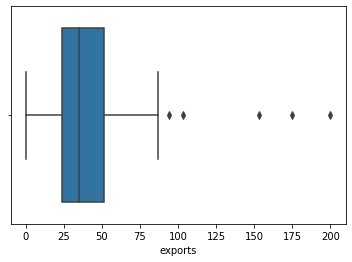

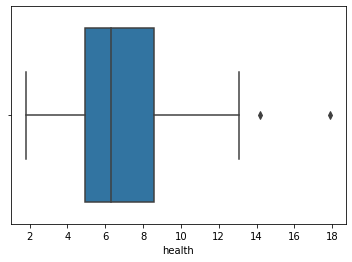

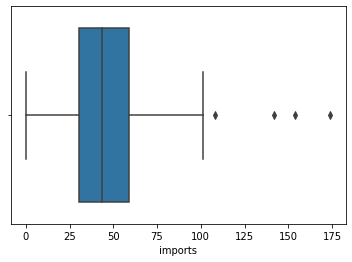

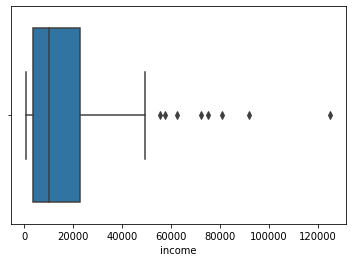

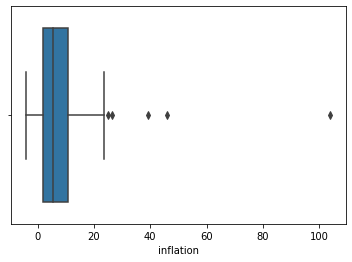

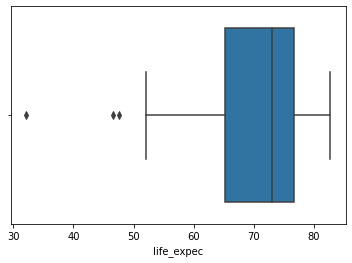

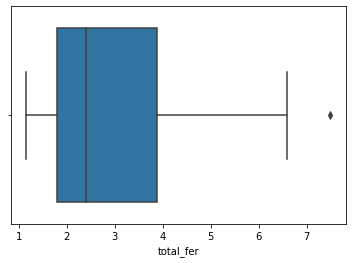

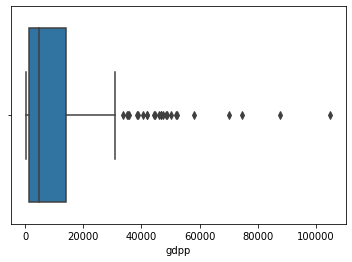

In [106]:
#checking for outliers
for i , predictor in enumerate(df.drop(columns = ['country'])):
    plt.figure(i)
    sns.boxplot(data = df , x = predictor)

In [107]:
#performing capping(replacing the outliers which are below lower fence with lower fence value and higher fence with higher fence value)
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

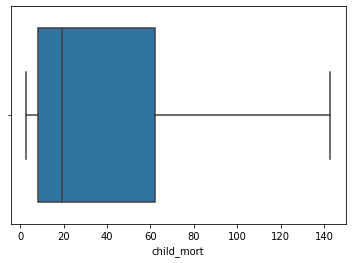

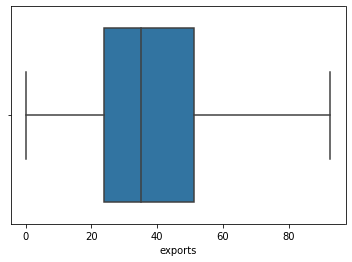

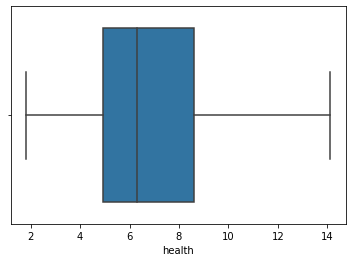

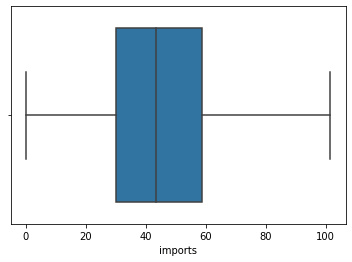

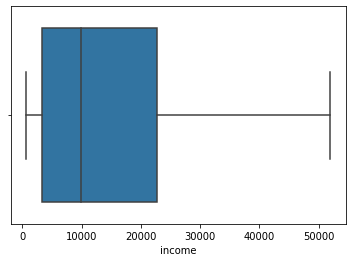

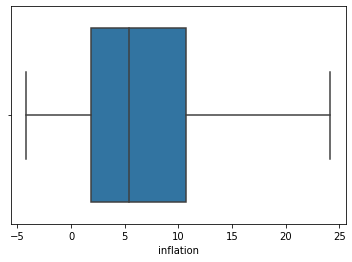

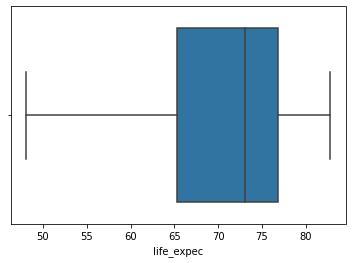

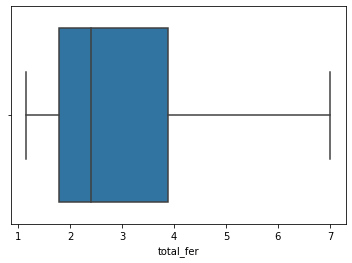

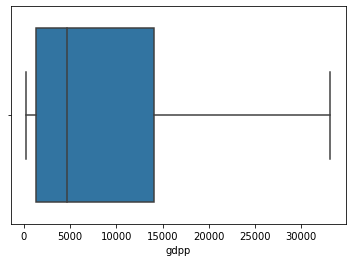

In [108]:
#checking for outliers
for i , predictor in enumerate(df.drop(columns = ['country'])):
    plt.figure(i)
    sns.boxplot(data = df , x = predictor)

<AxesSubplot:>

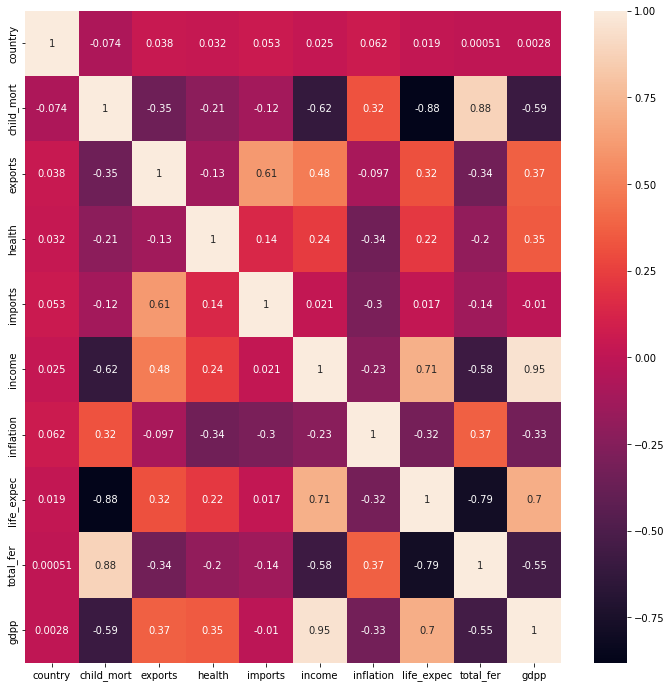

In [109]:
#checking correaltion
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True)

# Univariant analysis

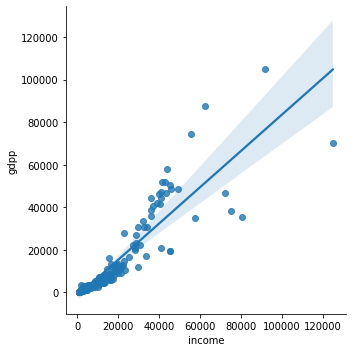

In [193]:
sns.lmplot(data = df,x='income',y='gdpp')

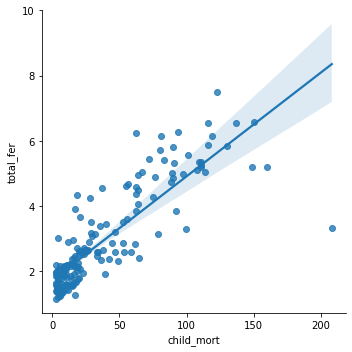

In [195]:
sns.lmplot(data = df,x='child_mort',y='total_fer')

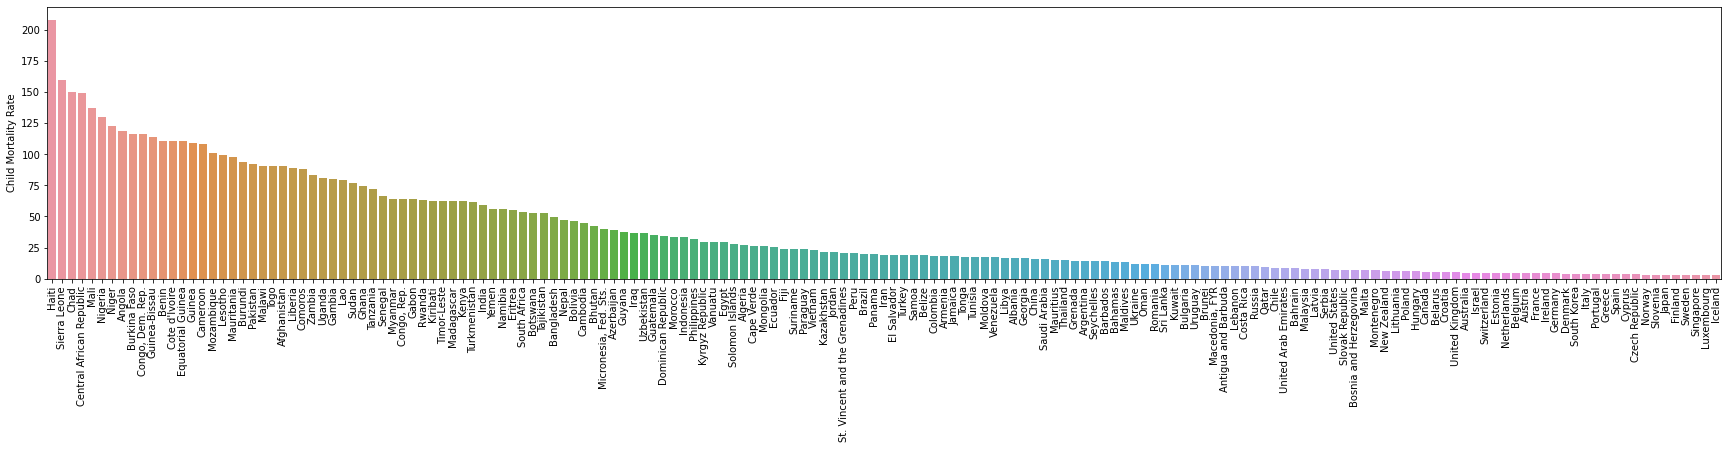

In [196]:

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

which all countries has highest child mort

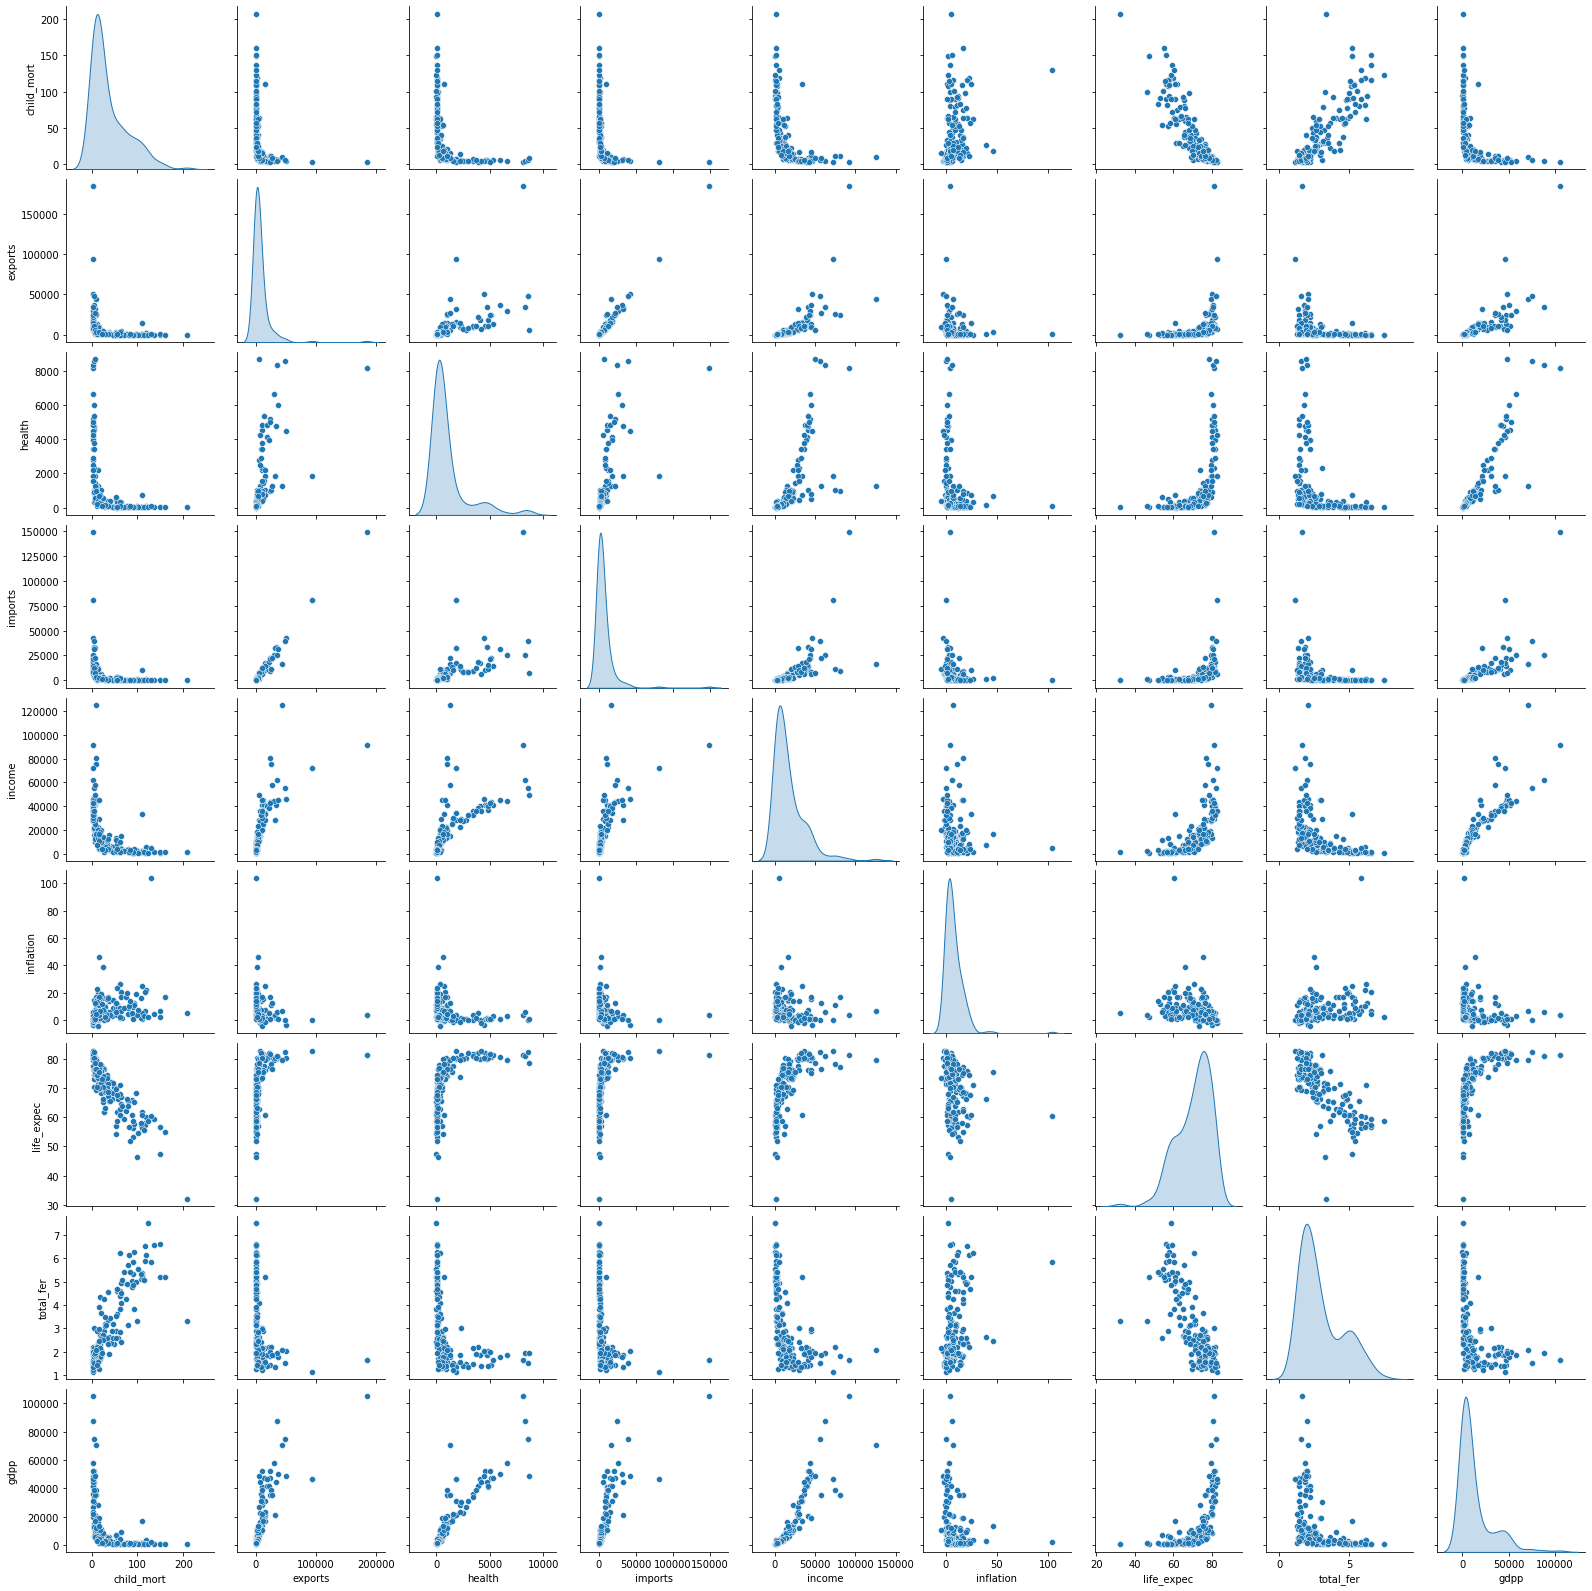

In [197]:
sns.pairplot(df,diag_kind="kde")
plt.show()

In [79]:
#df_1 = df.drop(['country'],axis = True)
country = df['country']

In [110]:
df_1 = df.drop(['country'],axis = True)# then i drop the label encoded country column bcoz i just did it for outliers 

In [111]:
df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [112]:
country # see country names i will use it later

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

# data preparation and scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_1)

In [114]:
scaled_df

array([[ 1.36980194, -1.39110684,  0.29601312, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.54354731, -0.09119005, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.05384625, -0.98589252, ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738,  1.52826487,  0.01782832, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.44937403, -0.60620786, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.11976755, -0.33930082, ..., -2.19651829,
         1.63547189, -0.7679976 ]])

# PCA

In [115]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_df)
pca.explained_variance_ratio_

array([0.48892383, 0.16452848, 0.13756787, 0.09504553, 0.0650032 ,
       0.02011842, 0.01655859, 0.00899467, 0.00325941])

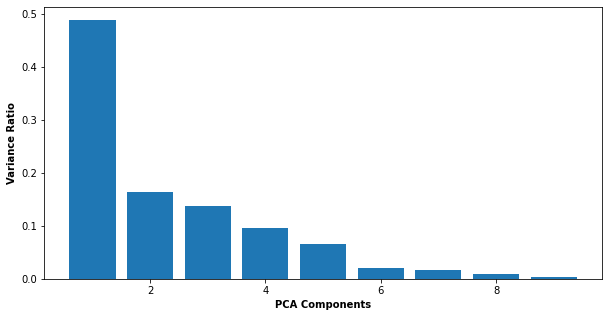

In [116]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

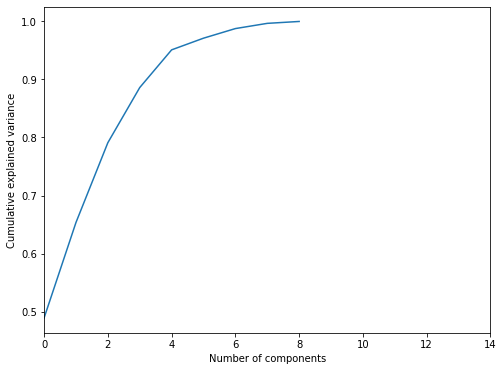

In [117]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

and i created 4 pc in graph we can see 95% of variance is explained by those 4 

In [118]:
from sklearn.decomposition import IncrementalPCA
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=4)

In [119]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(scaled_df)
df_inc_pca

array([[-3.17720411e+00, -2.94854436e-01,  1.00333066e+00,
         7.75705233e-01],
       [ 4.35688054e-01, -2.36973295e-01,  2.71383199e-01,
        -1.39092493e+00],
       [-4.16481523e-01, -5.49795763e-01, -1.69343957e+00,
        -6.06611677e-01],
       [-3.30706486e+00,  1.16553699e+00, -2.10075335e+00,
         1.70339411e+00],
       [ 1.25226586e+00,  5.46593579e-01,  1.79674182e-01,
        -7.21339048e-01],
       [-2.45848664e-02, -2.15019364e+00, -1.22746101e+00,
        -1.66556601e-02],
       [-2.02781990e-01, -3.68092377e-01, -4.05775645e-01,
        -1.63827807e+00],
       [ 2.64711179e+00, -2.24627893e+00,  3.43392521e-01,
         6.40616970e-01],
       [ 3.41061743e+00, -5.47710904e-01,  8.00294227e-01,
         1.13189307e+00],
       [-2.15845501e-01, -4.67376749e-01, -1.35106228e+00,
        -1.45903340e-01],
       [ 1.76844613e+00, -5.70935693e-01,  7.16300527e-01,
         1.36187066e-01],
       [ 2.08043150e+00,  6.90775980e-01, -1.32057150e+00,
      

In [120]:
df_pca= pd.DataFrame(df_inc_pca,columns = ['pc1','pc2','pc3','pc4'])
df_pca.head()# making the dataframe

,pc1,pc2,pc3,pc4
0,-3.177204,-0.294854,1.003331,0.775705
1,0.435688,-0.236973,0.271383,-1.390925
2,-0.416482,-0.549796,-1.693440,-0.606612
3,-3.307065,1.165537,-2.100753,1.703394
4,1.252266,0.546594,0.179674,-0.721339


In [121]:
df_pca = pd.concat([country,df_pca],axis = 1)
df_pca.head() #just concatenating country we will use this futhure

,country,pc1,pc2,pc3,pc4
0,Afghanistan,-3.177204,-0.294854,1.003331,0.775705
1,Albania,0.435688,-0.236973,0.271383,-1.390925
2,Algeria,-0.416482,-0.549796,-1.693440,-0.606612
3,Angola,-3.307065,1.165537,-2.100753,1.703394
4,Antigua and Barbuda,1.252266,0.546594,0.179674,-0.721339


<AxesSubplot:>

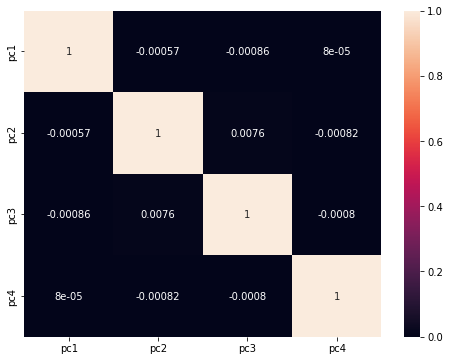

In [124]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pca.corr(),annot = True)# after pca i checked is there any correaltion left so there was not 

In [125]:
df_pca_1 = df_pca.drop(['country'],axis = True)
df_pca_1 # then again i dropped for making cluster i dont want it while creating cluster

,pc1,pc2,pc3,pc4
0,-3.177204,-0.294854,1.003331,0.775705
1,0.435688,-0.236973,0.271383,-1.390925
2,-0.416482,-0.549796,-1.693440,-0.606612
3,-3.307065,1.165537,-2.100753,1.703394
4,1.252266,0.546594,0.179674,-0.721339
...,...,...,...,...
162,-0.883095,0.942724,0.294000,-0.685185
163,-0.238083,-1.661144,-2.379778,-0.063357
164,0.311878,2.140676,-0.431856,-0.738178
165,-2.267748,-0.508563,-1.613616,0.326705


# KMeans cluster

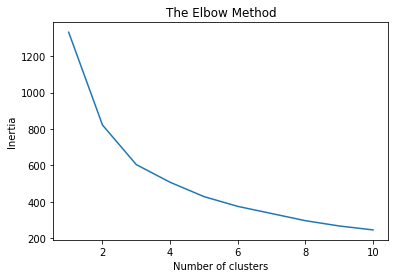

In [126]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 7)
    
    kmeans.fit(df_pca_1)
    
    cs.append(kmeans.inertia_)

# plot the 
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [129]:
#so i made the 4 clusters after looking to elbow method  
model = KMeans(n_clusters = 4,max_iter = 150, random_state = 42)
model.fit(df_pca_1)

KMeans(max_iter=150, n_clusters=4, random_state=42)

In [132]:
model.cluster_centers_

array([[ 0.52107273,  0.80025538,  0.30865538, -0.75406165],
       [-2.67047797,  0.10285477,  0.29655627,  0.66942745],
       [-0.36816607, -0.8256504 , -0.92714718, -0.57447876],
       [ 2.89389722, -0.43375611,  0.12742773,  0.82454366]])

In [133]:
model.inertia_

507.57709426332417

In [141]:
# then we predicted the labels
d  = model.labels_
d

array([1, 0, 2, 1, 0, 2, 2, 3, 3, 2, 3, 3, 2, 0, 0, 3, 0, 1, 0, 2, 0, 1,
       2, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 3, 3,
       3, 2, 2, 2, 0, 1, 1, 0, 0, 3, 3, 2, 1, 0, 3, 1, 3, 0, 2, 1, 1, 0,
       1, 0, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 2, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 2, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2,
       3, 3, 1, 1, 3, 2, 1, 0, 0, 2, 2, 0, 3, 3, 0, 2, 1, 0, 2, 1, 0, 0,
       1, 3, 0, 3, 0, 1, 3, 3, 2, 0, 1, 0, 3, 3, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 1, 0, 3, 3, 3, 2, 2, 0, 2, 0, 1, 1])

In [135]:
df_pca['cluster4'] = model.labels_
df_pca.head() # then i just put it in dataset for visualization

,country,pc1,pc2,pc3,pc4,cluster4
0,Afghanistan,-3.177204,-0.294854,1.003331,0.775705,1
1,Albania,0.435688,-0.236973,0.271383,-1.390925,0
2,Algeria,-0.416482,-0.549796,-1.693440,-0.606612,2
3,Angola,-3.307065,1.165537,-2.100753,1.703394,1
4,Antigua and Barbuda,1.252266,0.546594,0.179674,-0.721339,0


In [136]:
df_pca['cluster4'].value_counts()# these numbers are nothing how many countries are there in this clusters(0,1,2,3)

0    51
1    44
2    36
3    36
Name: cluster4, dtype: int64

In [146]:
from sklearn.metrics import silhouette_score

In [147]:
#Silhouette score analysis to find the ideal number of clusters for K-means clustering just cross checking that 4 cluster should be enough or not
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_1)
     
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3237438033611924
For n_clusters=3, the silhouette score is 0.32131941275046405
For n_clusters=4, the silhouette score is 0.3278130104979472
For n_clusters=5, the silhouette score is 0.3045569668025135
For n_clusters=6, the silhouette score is 0.28990082185380783
For n_clusters=7, the silhouette score is 0.3164360362013356
For n_clusters=8, the silhouette score is 0.3143036681714835


so after seeing the silhouette score i was not satsified that i should go with four clusters but then too with some and help and research i found that 4 or 5 clusters wont make much diff so we can go either with 4 or 5

In [159]:
df["cluster4"] = model.labels_
df.head()
# just ignore this step merina i was just trying to find something

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [158]:
#Here, exports, heath and imports variables are in percenatge of the total GDP format. So, It is converted into actual value on the basis of GDPP as below .
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [165]:
df = df.drop(['cluster4'],axis = 1)
df#ignore this step 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [170]:
# in this i am creating two dataframe one now merging all columns(cluster4 , country, import export ) in original dataset 
df_merge = pd.merge(df,df_pca,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster4']]

#and second one is Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["cluster4"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["cluster4"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["cluster4"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["cluster4"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["cluster4"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["cluster4"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["cluster4"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["cluster4"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["cluster4"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,18.976471,3310.735608,3792.396667,434.330545,11641.176471,3.931843,72.576471,2.233922,6335.215686
1,1,95.740909,733.102477,734.348205,99.194720,3380.295455,12.003750,58.934091,5.071364,1634.363636
2,2,28.441667,2290.781181,1798.012530,352.396378,13300.833333,13.210833,72.372222,2.547500,6355.722222
3,3,5.188889,26546.422222,22494.522222,3813.131944,45608.333333,2.646861,80.080556,1.764722,42811.111111


In [171]:
#all columns has merged with real values of import export health
df_merge_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster4
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,0


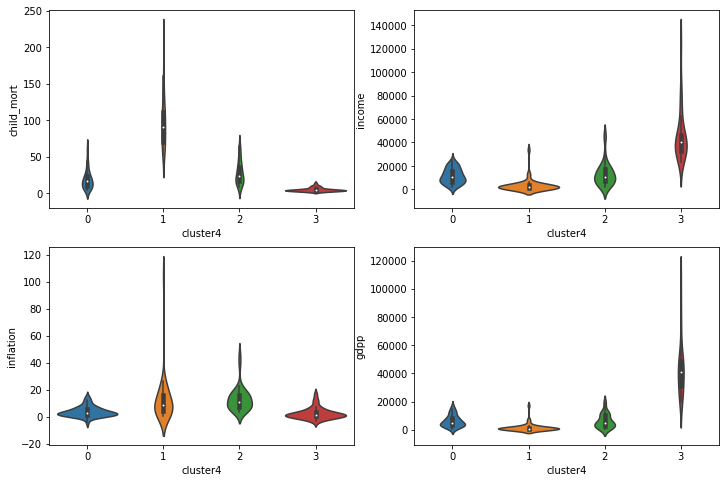

In [176]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.violinplot(x = 'cluster4', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.violinplot(x = 'cluster4', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.violinplot(x = 'cluster4', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.violinplot(x = 'cluster4', y = 'gdpp', data=df_merge_col,ax=axes[1][1])
plt.show()

this graph was making sense as
cluster 0 and 2 are developing countries
cluster 4 are developed countries 
cluster 3 are the under develpoed countries which need help


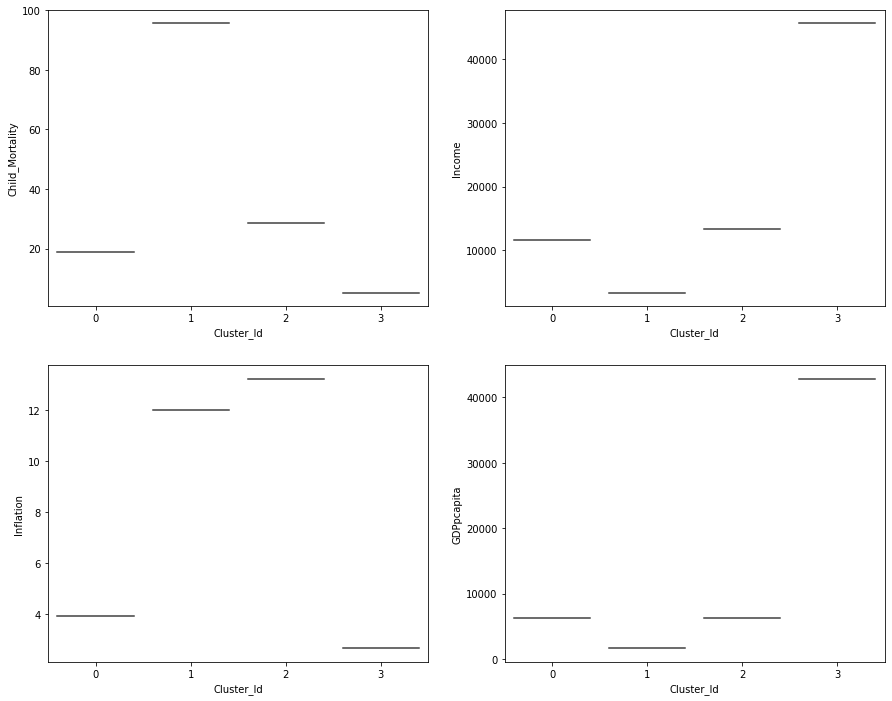

In [179]:
# Violin plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])
plt.show()

as the df of mean which we have created shows the same reult as above that cluster 1 has the highest child mort rate and there gdp and income is also weak same story as above

In [182]:
# List of countries in Cluster 1 this are the countries which needed help 

df_merge_col[df_merge_col['cluster4']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster4
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.6280,118.190,17.7508,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.0960,390.195,40.6341,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,1


but we dont have enough funds to help all the countries so again we will filter out more which needed the urgent help

In [183]:
#assigining the cluster 1 countries to new vairable 
df_clus0 = df_merge_col[df_merge_col['cluster4'] ==1]
df_clus0.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster4
0,Afghanistan,90.2,55.300,248.297,41.9174,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.190,1514.370,100.6050,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.404,281.976,31.0780,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.600,3257.550,527.0500,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.400,170.200,38.7550,1430,6.810,57.9,5.87,575,1


In [185]:
df_clus0.describe()#five point summary for mean

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster4
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,95.740909,733.102477,734.348205,99.194720,3380.295455,12.003750,58.934091,5.071364,1634.363636,1.0
std,32.541382,2244.960817,1559.659545,160.993953,5330.665034,15.959373,6.521376,1.041744,2788.621015,0.0
min,52.500000,20.605200,90.552000,12.821200,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,70.625000,101.630250,188.805500,31.969950,1380.000000,4.080000,56.450000,4.607500,532.250000,1.0
50%,90.400000,170.914000,292.389000,46.213750,1835.000000,8.855000,59.400000,5.155000,763.500000,1.0
75%,111.750000,395.640000,536.700000,67.989000,3290.000000,16.225000,62.350000,5.737500,1310.000000,1.0
max,208.000000,14671.800000,10071.900000,766.080000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


In [187]:
# listing the countries which have child mort more than the avg
df_final_list = df[df['child_mort']>95]
df_final_list.shape
#and u can see shape has decreased

(19, 10)

In [189]:
#listing the countries more which have high child mort with less income
df_final_list1 = df_final_list[df_final_list['income']<=3380]
df_final_list1.shape

(16, 10)

In [190]:
#listing the countries more which have high child mort less income with less gdp too
df_final_list2 = df_final_list1[df_final_list1['gdpp']<=1634]
df_final_list2.shape

(16, 10)

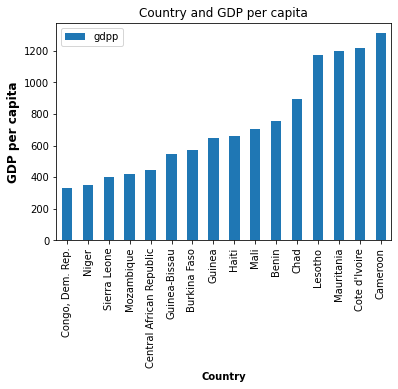

In [191]:
#in end plotting the graph to see in order which have the highest chil mort with less income and gdp
df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()